<a href="https://colab.research.google.com/github/rakesh22230/Machine_Learning_Practise/blob/main/LabReport3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training with lr=0.01, epochs=500, activation=sigmoid
Epoch 0, Loss: 0.2500
Accuracy: 50.00%

Training with lr=0.01, epochs=500, activation=relu
Epoch 0, Loss: 0.2501
Accuracy: 50.00%

Training with lr=0.01, epochs=1000, activation=sigmoid
Epoch 0, Loss: 0.2501
Accuracy: 75.00%

Training with lr=0.01, epochs=1000, activation=relu
Epoch 0, Loss: 0.2500
Accuracy: 75.00%

Training with lr=0.01, epochs=5000, activation=sigmoid
Epoch 0, Loss: 0.2501
Epoch 1000, Loss: 0.2500
Epoch 2000, Loss: 0.2500
Epoch 3000, Loss: 0.2500
Epoch 4000, Loss: 0.2500
Accuracy: 50.00%

Training with lr=0.01, epochs=5000, activation=relu
Epoch 0, Loss: 0.2508
Epoch 1000, Loss: 0.2500
Epoch 2000, Loss: 0.2498
Epoch 3000, Loss: 0.2489
Epoch 4000, Loss: 0.2447
Accuracy: 75.00%

Training with lr=0.1, epochs=500, activation=sigmoid
Epoch 0, Loss: 0.2501
Accuracy: 50.00%

Training with lr=0.1, epochs=500, activation=relu
Epoch 0, Loss: 0.2500
Accuracy: 50.00%

Training with lr=0.1, epochs=1000, activation=sigmoid
Epo

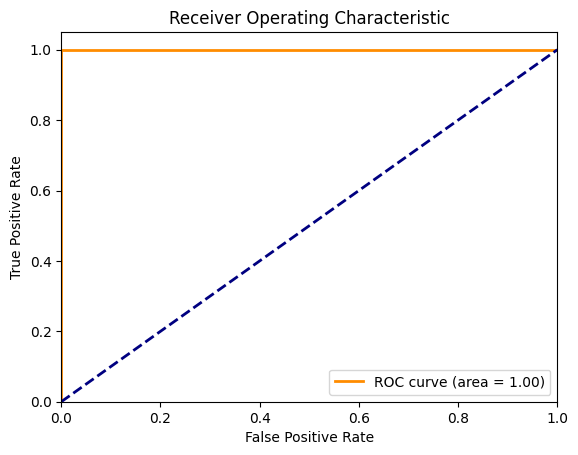

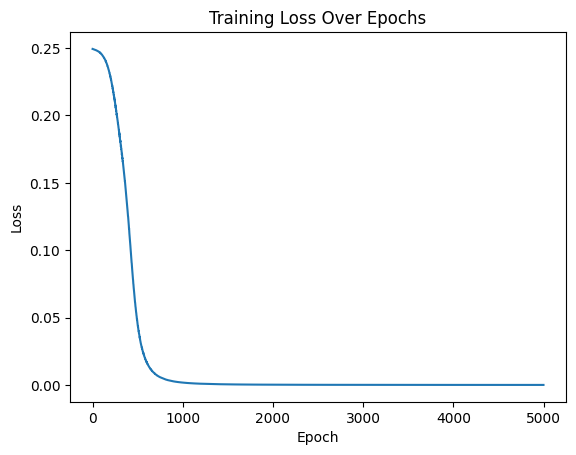

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Preparation
# XOR problem inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

## 2. MLP Architecture Definition
class MLP:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Initialize weights with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.activation = activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        if self.activation == 'sigmoid':
            self.a1 = self.sigmoid(self.z1)
        else:
            self.a1 = self.relu(self.z1)

        # Output layer (always sigmoid for binary classification)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]  # number of samples

        # Output layer error
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Hidden layer error
        if self.activation == 'sigmoid':
            dA1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.a1)
        else:
            dA1 = np.dot(dZ2, self.W2.T) * self.relu_derivative(self.a1)

        dW1 = np.dot(X.T, dA1) / m
        db1 = np.sum(dA1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, learning_rate, epochs):
        self.loss_history = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Calculate loss (mean squared error)
            loss = np.mean((output - y) ** 2)
            self.loss_history.append(loss)

            # Backward pass and weight update
            self.backward(X, y, learning_rate)

            # Print progress
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

## 3. Evaluation Metrics Functions
def accuracy(y_true, y_pred):
    # Convert probabilities to binary predictions (0 or 1)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return np.mean(y_pred_binary == y_true) * 100

def precision(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    true_positives = np.sum((y_pred_binary == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred_binary == 1)
    return true_positives / (predicted_positives + 1e-7)  # Add small value to avoid division by zero

def recall(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    true_positives = np.sum((y_pred_binary == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / (actual_positives + 1e-7)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + 1e-7)

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## 4. Hyperparameter Tuning and Training
# We'll try different combinations of hyperparameters
learning_rates = [0.01, 0.1, 0.5]
epochs_list = [500, 1000, 5000]
activations = ['sigmoid', 'relu']

best_accuracy = 0
best_model = None
best_params = {}

for lr in learning_rates:
    for epochs in epochs_list:
        for activation in activations:
            print(f"\nTraining with lr={lr}, epochs={epochs}, activation={activation}")

            # Create and train model
            model = MLP(input_size=2, hidden_size=2, output_size=1, activation=activation)
            model.train(X, y, learning_rate=lr, epochs=epochs)

            # Evaluate
            predictions = model.forward(X)
            acc = accuracy(y, predictions)
            print(f"Accuracy: {acc:.2f}%")

            # Track best model
            if acc > best_accuracy:
                best_accuracy = acc
                best_model = model
                best_params = {'lr': lr, 'epochs': epochs, 'activation': activation}

## 5. Evaluate Best Model
print("\nBest Model Parameters:")
print(f"Learning Rate: {best_params['lr']}")
print(f"Epochs: {best_params['epochs']}")
print(f"Activation: {best_params['activation']}")
print(f"Accuracy: {best_accuracy:.2f}%")

# Make predictions with best model
final_predictions = best_model.forward(X)
print("\nPredictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, True: {y[i][0]}, Predicted: {final_predictions[i][0]:.4f}")

# Calculate metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy(y, final_predictions):.2f}%")
print(f"Precision: {precision(y, final_predictions):.4f}")
print(f"Recall: {recall(y, final_predictions):.4f}")
print(f"F1 Score: {f1_score(y, final_predictions):.4f}")

# Plot ROC curve
plot_roc_curve(y, final_predictions)

# Plot training loss
plt.plot(best_model.loss_history)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()